# Week 10 Practice

In [1]:
%load_ext pycodestyle_magic
%flake8_on --ignore E266 --max_line_length 99

### Recap

Last class we implmented functions called `f_torch` that evaluated $f(x) = 3x^\intercal x - x_1 - 4$.

In [2]:
import torch
import numpy as np


def f_torch(x):
    return 3 * x.dot(x) - x[0] - 4

### Problem 1: Minimizing our function with gradient descent
Write a function that minimizes $f$ using gradient descent, by calling by calling `f_torch`. The function should take two arguments: an initial iterate `x0` and a number of gradient descent iterations `num_iters`. It should return the minimizer.

In [3]:
def minimize(x0, num_iters, step_size=0.1):
    # YOUR CODE HERE
    x0.requires_grad_(True)
    for i in range(num_iters):
        y = f_torch(x0)
        y.backward()
        with torch.no_grad():
            x0 -= step_size * x0.grad
            x0.grad.zero_()
    return x0

In [4]:
x_opt = minimize(torch.zeros(3), 30)
assert (x_opt - torch.Tensor([0.1667, 0.0000, 0.0000])).norm() < 1e-3

### Problem 2: Working with PyTorch datasets
Find the mean brightness of CIFAR-10 images by iterating through the dataset and summing the pixel intensities.

In [5]:
from torchvision import datasets
import torchvision.transforms as transforms


trainset = datasets.CIFAR10(root='./data',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

Files already downloaded and verified


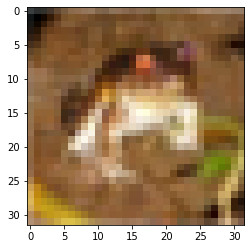

In [6]:
from matplotlib import pyplot as plt


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


for img, label in trainset:
    imshow(img)
    break

In [13]:
def mean_brightness_directly(dataset):
    # YOUR CODE HERE
    total = 0
    n_pixels = 0

    for img, label in dataset:
        total += img.sum().item()
        n_pixels += img.numel()

    return total/n_pixels

In [14]:
assert abs(mean_brightness_directly(trainset) - 0.4733) < 1e-4

### Problem 3: Data loaders
Find the mean brightness of CIFAR-10 images by iterating through the dataset using a DataLoader with a batch size of 256.

In [9]:
from torch.utils.data import DataLoader


def mean_brightness_dataloader(dataset):
    # Your code here
    total = 0
    n_pixels = 0
    loader = DataLoader(trainset, batch_size=256, shuffle=True)
    for img, label in loader:
        total += img.sum().item()
        n_pixels += img.numel()
    return total/n_pixels

In [10]:
assert abs(mean_brightness_dataloader(trainset) - 0.4733) < 1e-4

### Problem 4: Minimizing a loss function using SGD
Find the mean brightness of CIFAR-10 images in two ways: by iterating through the dataset and summing the pixel intensities and with stochastic gradient descent, by minimizing squared error.

In [11]:
def mean_brightness_sgd(dataset):
    loader = DataLoader(trainset, batch_size=256, shuffle=True)
    cur_mean = torch.zeros(1)
    cur_mean.requires_grad_(True)
    # YOUR CODE HERE
    optimizer = torch.optim.SGD([cur_mean], lr=1e-8)
    for epoch in range(5):
        for img, label in loader:
            residual = img - cur_mean
            loss = (residual**2).sum()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    return cur_mean.data.item()

In [12]:
assert abs(mean_brightness_sgd(trainset) - 0.4733) < 1e-2